In [28]:
import numpy as np
from matplotlib import pyplot as plt
from plot_utils import *

data = {
    'stats_geo1x1_sol1_ph0_bb1_fr1': load_data('../stats/stats_geo1x1_sol1_ph0_bb1_fr1.json'),
    'stats_geo1x1_sol1_ph1_bb1_fr1': load_data('../stats/stats_geo1x1_sol1_ph1_bb1_fr1.json'),
    'stats_geo1x1_sol2_ph0_bb1_fr1': load_data('../stats/stats_geo1x1_sol2_ph0_bb1_fr1.json'),
    'stats_geo1x1_sol2_ph1_bb1_fr1': load_data('../stats/stats_geo1x1_sol2_ph1_bb1_fr1.json'),
}

shape = [2, 2]
figsize = (12, 5)

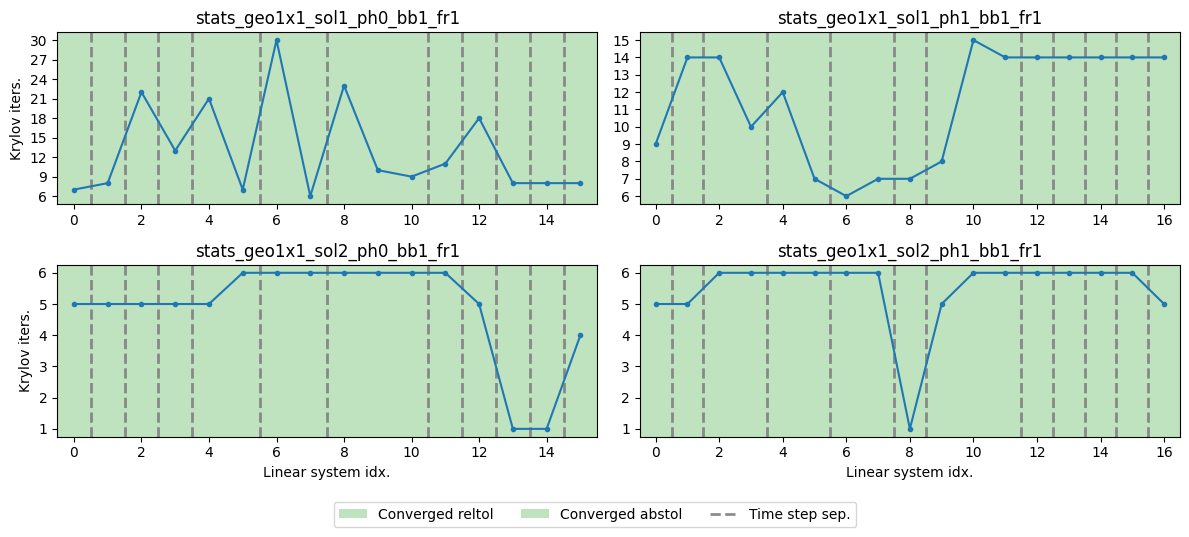

In [29]:
def render_element(entry: list[TimeStepStats]):
    color_converged_reason(entry)
    color_time_steps(entry, fill=False, legend=True)
    set_integer_ticks('vertical')
    plt.gca().grid(False)
    plt.plot(get_gmres_iterations(entry), marker='.')

plot_grid(data, render_element, shape=shape, figsize=figsize, legend=True)

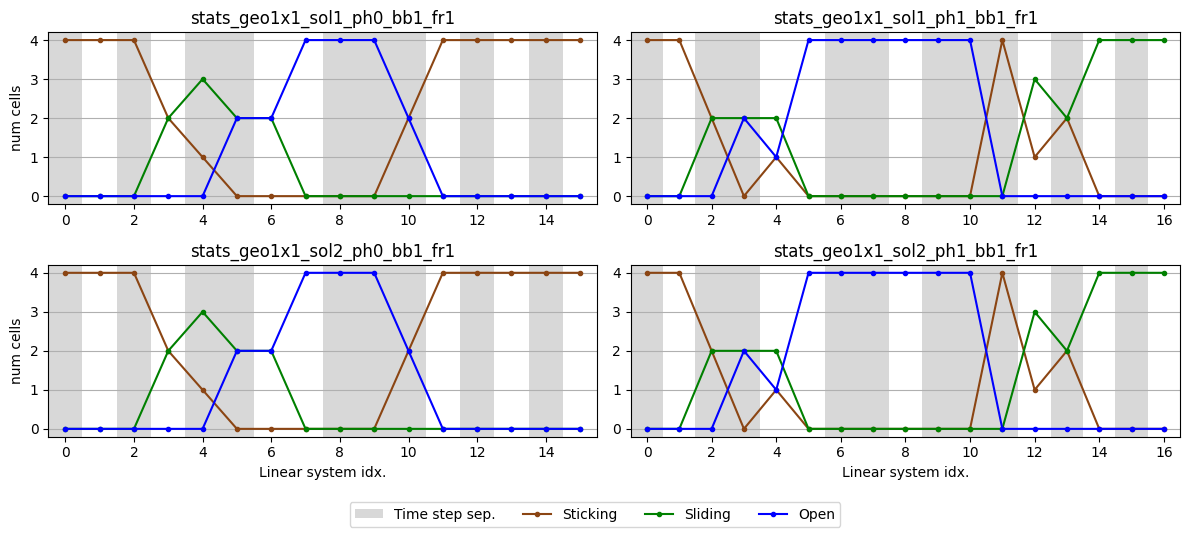

In [30]:
def render_element(i: int, entry: Sequence[TimeStepStats]):
    st, sl, op = get_num_sticking_sliding_open(entry)
    color_time_steps(entry, fill=True, grid=False, legend=True)
    plt.gca().grid(False)
    plt.gca().grid(True, which='major', axis='y')
    plt.plot(st, label="Sticking", marker=".", color=COLOR_STICKING)
    plt.plot(sl, label="Sliding", marker=".", color=COLOR_SLIDING)
    plt.plot(op, label="Open", marker=".", color=COLOR_OPEN)
    # plt.plot(tr, label="Transition", marker=".", color=COLOR_TRANSITION)


plot_grid(data, render_element, shape=shape, figsize=figsize, 
        #   ylabel="Fract. len., m"
        ylabel='num cells'
          )
# plt.savefig(save_path + 'fracture_length.pdf', bbox_inches='tight')

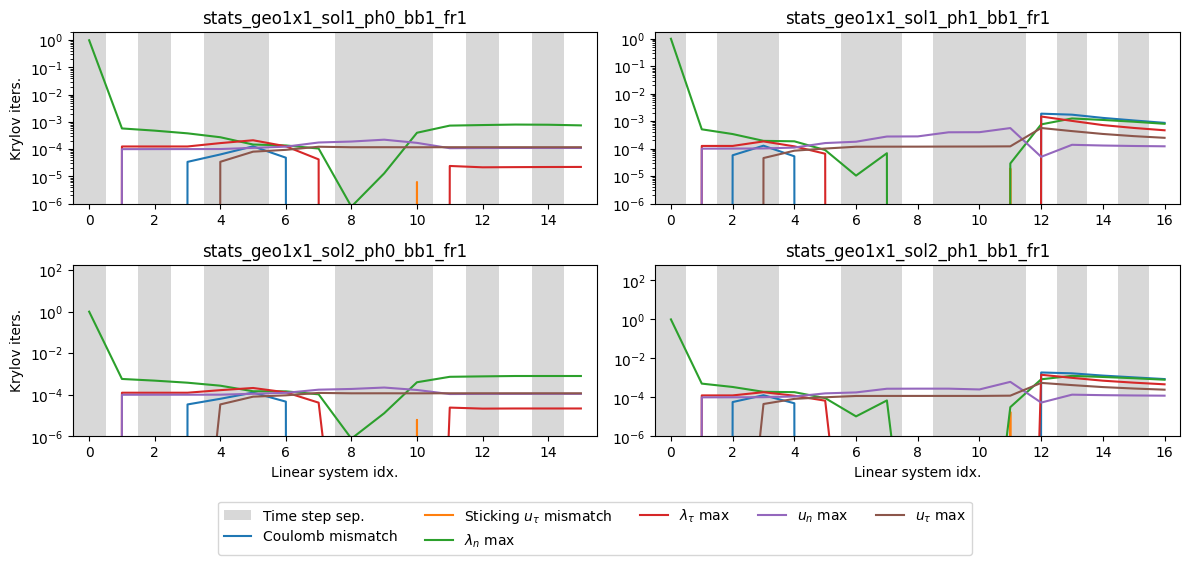

In [31]:
def render_element(i: int, entry: Sequence[TimeStepStats]):
    coulomb_mismatch = [ls.coulomb_mismatch for ts in entry for ls in ts.linear_solves]
    sticking_ut = [ls.sticking_u_mismatch for ts in entry for ls in ts.linear_solves]
    lambdan_max = [ls.lambdan_max for ts in entry for ls in ts.linear_solves]
    lambdat_max = [ls.lambdat_max for ts in entry for ls in ts.linear_solves]
    ujumpn_max = [ls.un_max for ts in entry for ls in ts.linear_solves]
    ujumpt_max = [ls.ut_max for ts in entry for ls in ts.linear_solves]

    color_time_steps(entry, fill=True, grid=False, legend=True)
    plt.plot(coulomb_mismatch, label='Coulomb mismatch')
    plt.plot(sticking_ut, label=r'Sticking $u_\tau$ mismatch')
    plt.plot(lambdan_max, label=r'$\lambda_n$ max')
    plt.plot(lambdat_max, label=r'$\lambda_\tau$ max')
    plt.plot(ujumpn_max, label=r'$u_n$ max')
    plt.plot(ujumpt_max, label=r'$u_\tau$ max')
    plt.yscale('log')
    plt.ylim(bottom=1e-6)

plot_grid(data, render_element, shape=shape, figsize=figsize, 
        #   ylabel="Fract. len., m"
        # ylabel='num cells'
          )

In [32]:
from mat_utils import *
from plot_utils import *
from block_matrix import *
from fixed_stress import *
from pp_utils import build_mechanics_near_null_space
from tmp_model import make_model, setup

model = make_model(setup)
model.prepare_simulation()
print(model.simulation_name())
model.before_nonlinear_loop()
model.before_nonlinear_iteration()
model.assemble_linear_system()

J = model.bmat.copy()
rhs = model.linear_system[1]
# J.matshow_blocks()


stats_geo1x1_sol2_ph1_bb1_fr1

Sim time: 0, Dt: 0.5
sticking: 4, sliding: 0, open: 0


/home/porepy/.local/lib/python3.11/site-packages/scipy/sparse/_index.py:142: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_arrayXarray_sparse(i, j, x)


Solve  took: 0.0
True residual permuted: 5.306112967470863e-11
True residual: 5.306096115001753e-11
PETSc Converged Reason: 2


{'mat_Q': BlockMatrixStorage of shape (768, 768) with 26623 elements with 6x6 active groups,
 'rhs_Q': array([-1.00000100e-05, -0.00000000e+00, -1.00000100e-05, -0.00000000e+00,
        -1.00000100e-05, -0.00000000e+00, -1.00000100e-05, -0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.

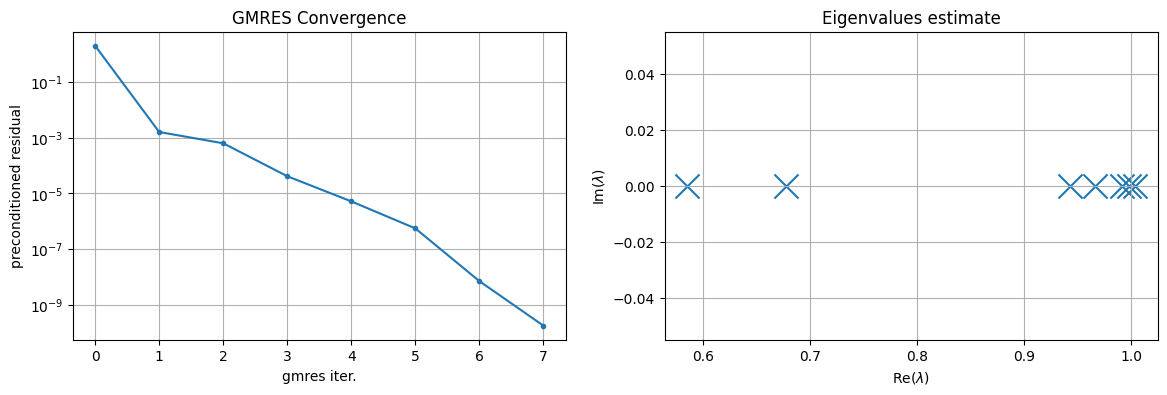

In [33]:
from pp_utils import make_solver_schema


solve_petsc_new(J, make_solver_schema(model), rhs_global=rhs, Qright=model.Qright())